# Qubit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error
from helplers.q_chem import *

DATA_DIR = f"../data/HeBz"

energy_unit = to_cm_1

cc_res = np.load(f"{DATA_DIR}/ccsd_t_2200.npy", allow_pickle=True).item()
dft_res = np.load(f"{DATA_DIR}/DFT_2200.npy", allow_pickle=True).item()
sapt_res = np.load(f"{DATA_DIR}/sapt_2200.npy", allow_pickle=True).item()
sapt_dt_cbs = np.load(f"{DATA_DIR}/sapt_dt_cbs.npy", allow_pickle=True).item()
sapt_tq_cbs = np.load(f"{DATA_DIR}/sapt_tq_cbs.npy", allow_pickle=True).item()

In [2]:
new_distances = []

for dist in cc_res["distances"]:
    dist = dist.split("___")
    x = dist[0]
    y = dist[1]
    z = dist[2]

    new_distances.append([x,y,z])

custom_sort = lambda item: (item[2], item[1], item[0])

sorted_pos = sorted(new_distances, key=custom_sort)


In [3]:
all_res = []
distances = []
pbe0 = []

aug_cc_pVDZ = []
aug_cc_pVTZ = []
aug_cc_pVQZ = []
cbs_dt = []
cbs_tq = []

sapt_dz = []
sapt_tz = []
sapt_qz = []
sapt_dt_cbs_all = []
sapt_tq_cbs_all = []


for pos in sorted_pos:

    pos = f"{pos[0]}___{pos[1]}___{pos[2]}"

    dft_en = dft_res[pos] * energy_unit[0]
    sapt_dt = sapt_dt_cbs[pos] * energy_unit[0]
    sapt_tq = sapt_tq_cbs[pos] * energy_unit[0]

    cc_dz = 0
    cc_tz = 0
    cc_qz = 0
    cc_dt = 0
    cc_tq = 0

    sap_dz = 0
    sap_tz = 0
    sap_qz = 0

    for i in cc_res["aug_cc_pVDZ"]:
        if i[0] == pos:
            cc_dz = i[1]
    if cc_dz == 0:
        print("dz not found")

    for i in cc_res["aug_cc_pVTZ"]:
        if i[0] == pos:
            cc_tz = i[1]
            break
    if cc_tz == 0:
        print("tz not found")

    for i in cc_res["aug_cc_pVQZ"]:
        if i[0] == pos:
            cc_qz = i[1]
            break
    if cc_qz == 0:
        print("qz not found")

    for i in cc_res["cbs_dt"]:
        if i[0] == pos:
            cc_dt = i[1]
            break
    if cc_dt == 0:
        print("dt not found")

    for i in cc_res["cbs_tq"]:
        if i[0] == pos:
            cc_tq = i[1]
            break
    if cc_tq == 0:
        print("tq not found")

    for i in sapt_res["DZ"]:
        if i["Distance"] == pos:
            sap_dz = i["Total"] * energy_unit[0] / 1000
            break
    if sap_dz == 0:
        print("sapt_dz not found")

    for i in sapt_res["TZ"]:
        if i["Distance"] == pos:
            sap_tz = i["Total"] * energy_unit[0] / 1000
            break
    if sap_tz == 0:
        print("sapt_tz not found")

    for i in sapt_res["QZ"]:
        if i["Distance"] == pos:
            sap_qz = i["Total"] * energy_unit[0] / 1000
            break
    if sap_qz == 0:
        print("sapt_qz not found")

    all_res.append(
        {
            "Position": pos,
            "CC_DZ": cc_dz,
            "CC_TZ": cc_tz,
            "CC_QZ": cc_qz,
            "CBS_DT": cc_dt,
            "CBS_TQ": cc_tq,
            "SAPT_DZ": sap_dz,
            "SAPT_TZ": sap_tz,
            "SAPT_QZ": sap_qz,
            "DFT_PBE0": dft_en,
            "SAPT_DT_CBS": sapt_dt,
            "SAPT_TQ_CBS": sapt_tq,
        }
    )


    pbe0.append(dft_en)
    sapt_dt_cbs_all.append(sapt_dt)
    sapt_tq_cbs_all.append(sapt_tq)
    distances.append(pos)
    aug_cc_pVDZ.append(cc_dz)
    aug_cc_pVTZ.append(cc_tz)
    aug_cc_pVQZ.append(cc_qz)
    cbs_dt.append(cc_dt)
    cbs_tq.append(cc_tq)
    sapt_dz.append(sap_dz)
    sapt_tz.append(sap_tz)
    sapt_qz.append(sap_qz)

In [4]:
intervals = []

for i, pt in enumerate(range(0, 2200, 88)):
    print(i, sorted_pos[pt][2])
    intervals.append((pt, pt + 88, sorted_pos[pt][2]))

0 2.50000000
1 2.62000000
2 2.74000000
3 2.86000000
4 2.98000000
5 3.10000000
6 3.10400000
7 3.10800000
8 3.11200000
9 3.11600000
10 3.12000000
11 3.12400000
12 3.12800000
13 3.13200000
14 3.13600000
15 3.14000000
16 3.14400000
17 3.14800000
18 3.15200000
19 3.15600000
20 3.16000000
21 4.12000000
22 5.08000000
23 6.04000000
24 7.00000000


In [5]:
from scipy.interpolate import make_interp_spline
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from helplers.he_bz_pes_plot import *

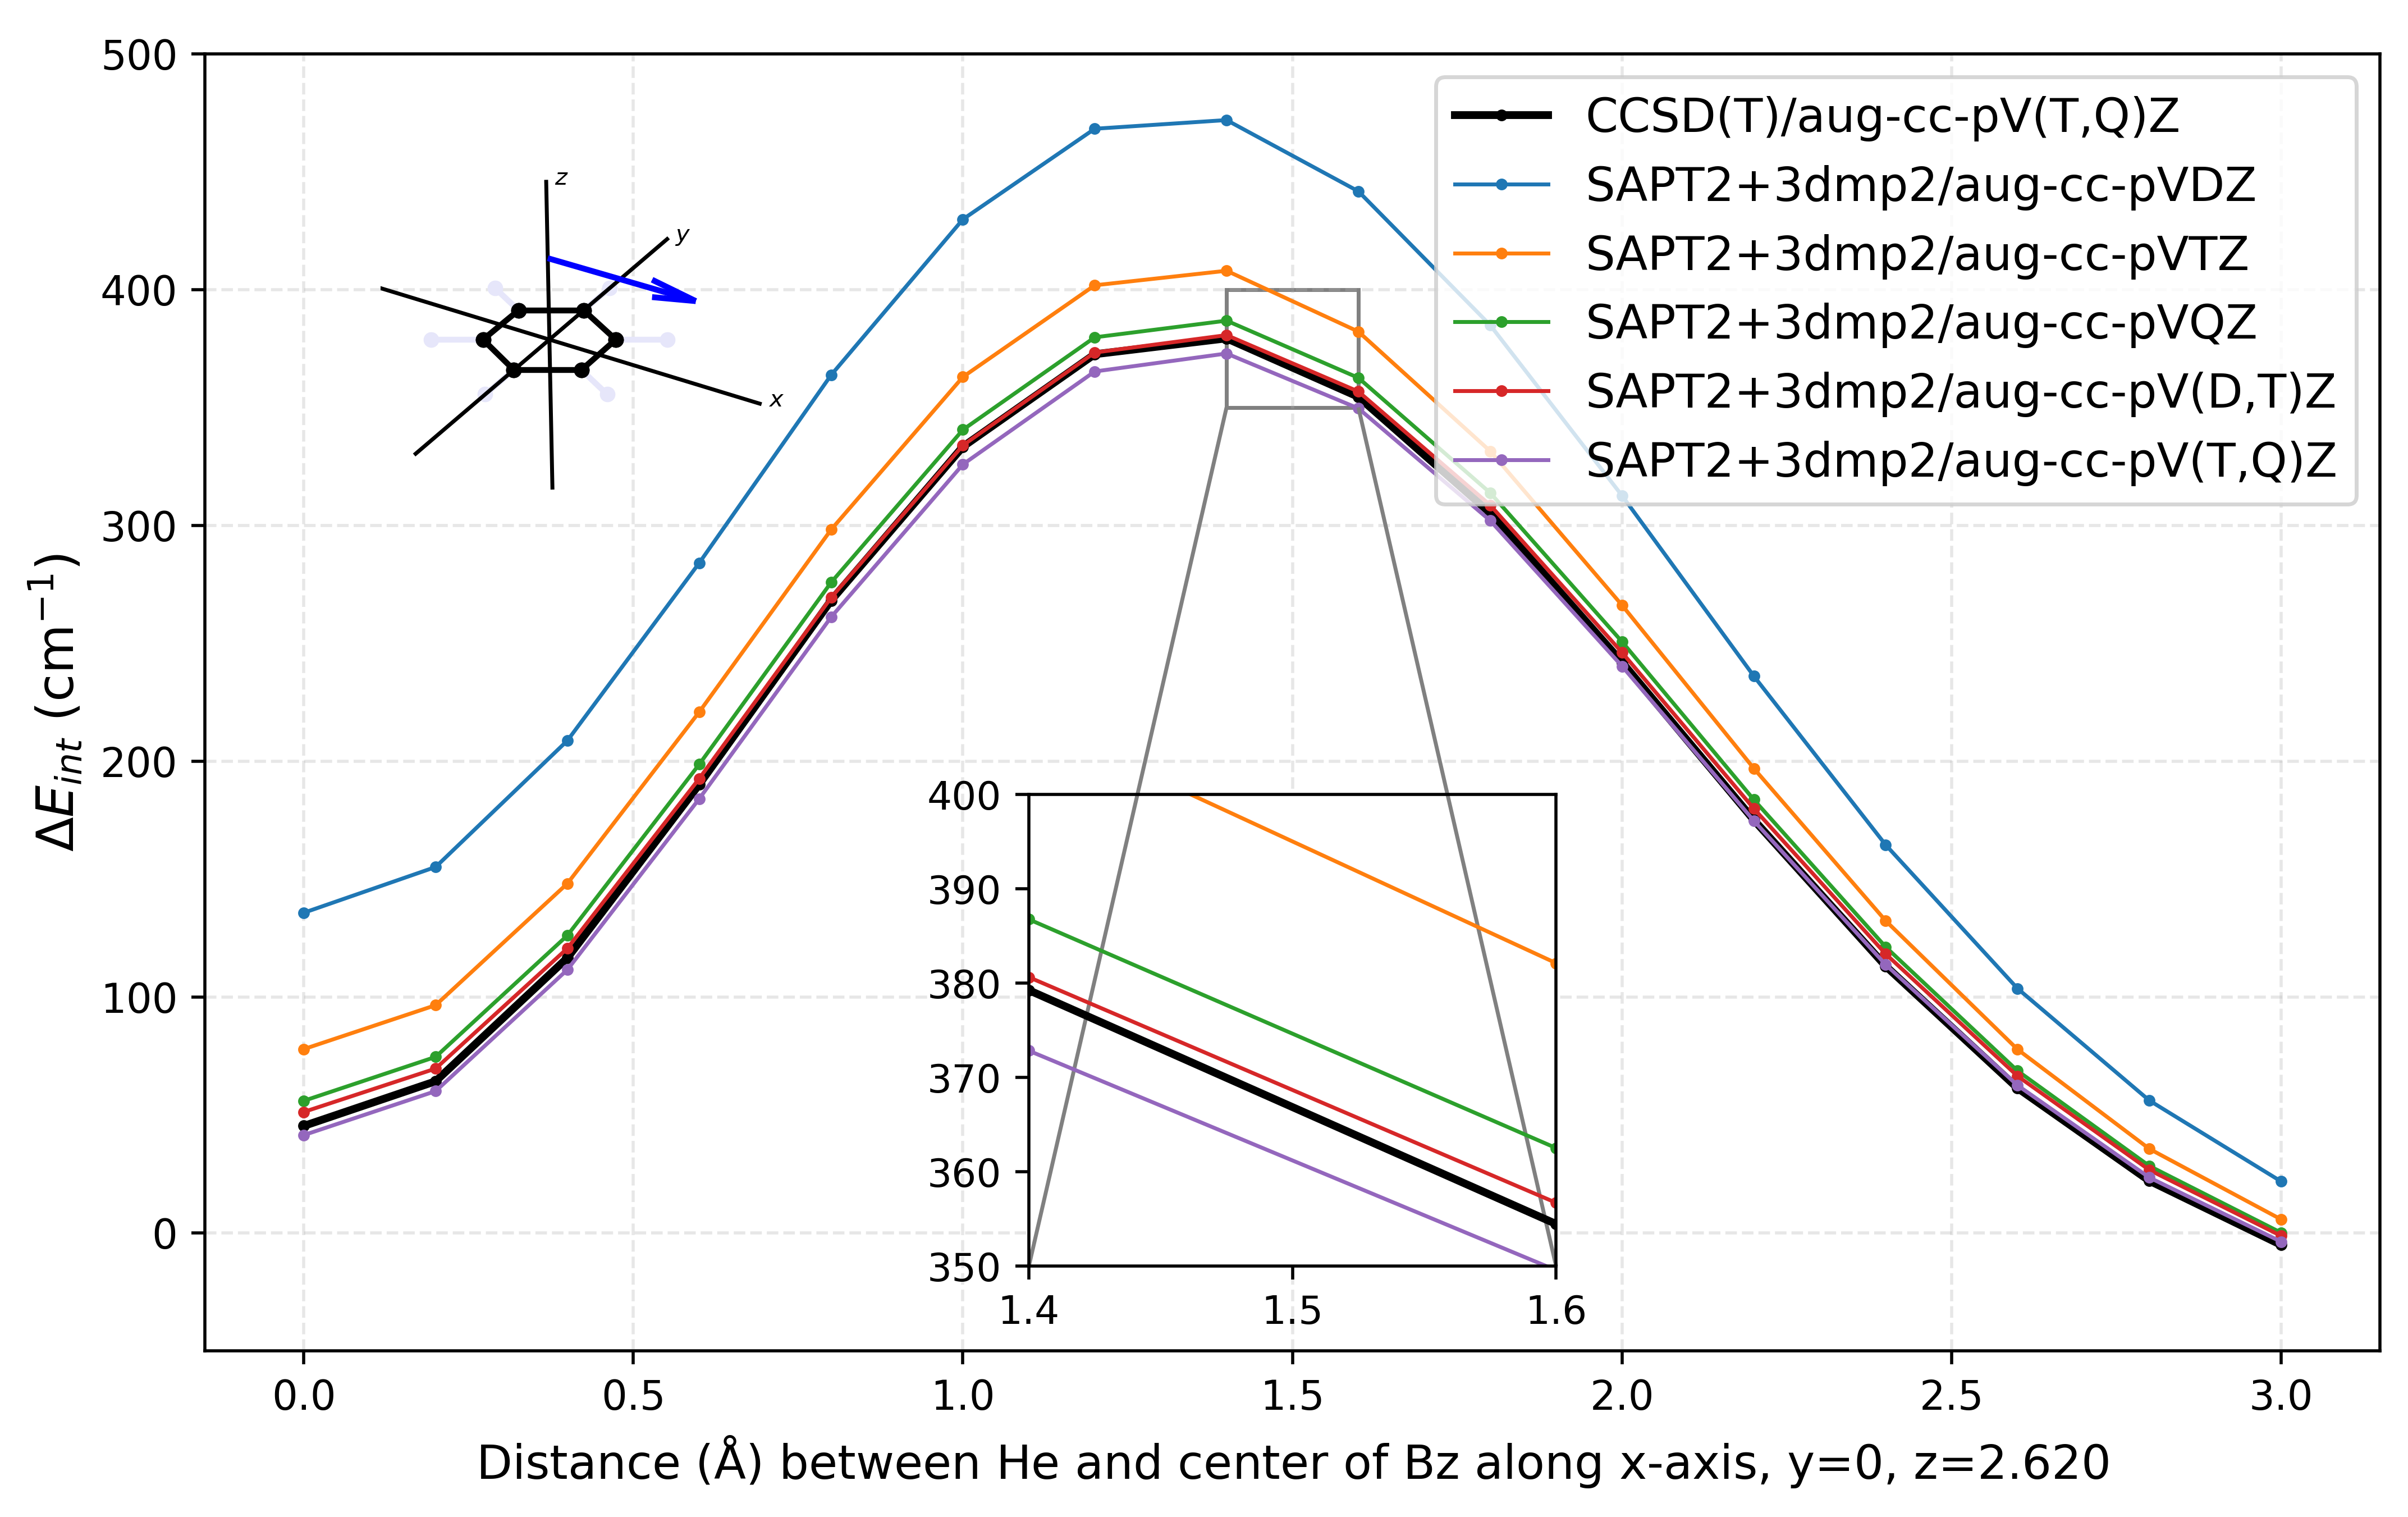

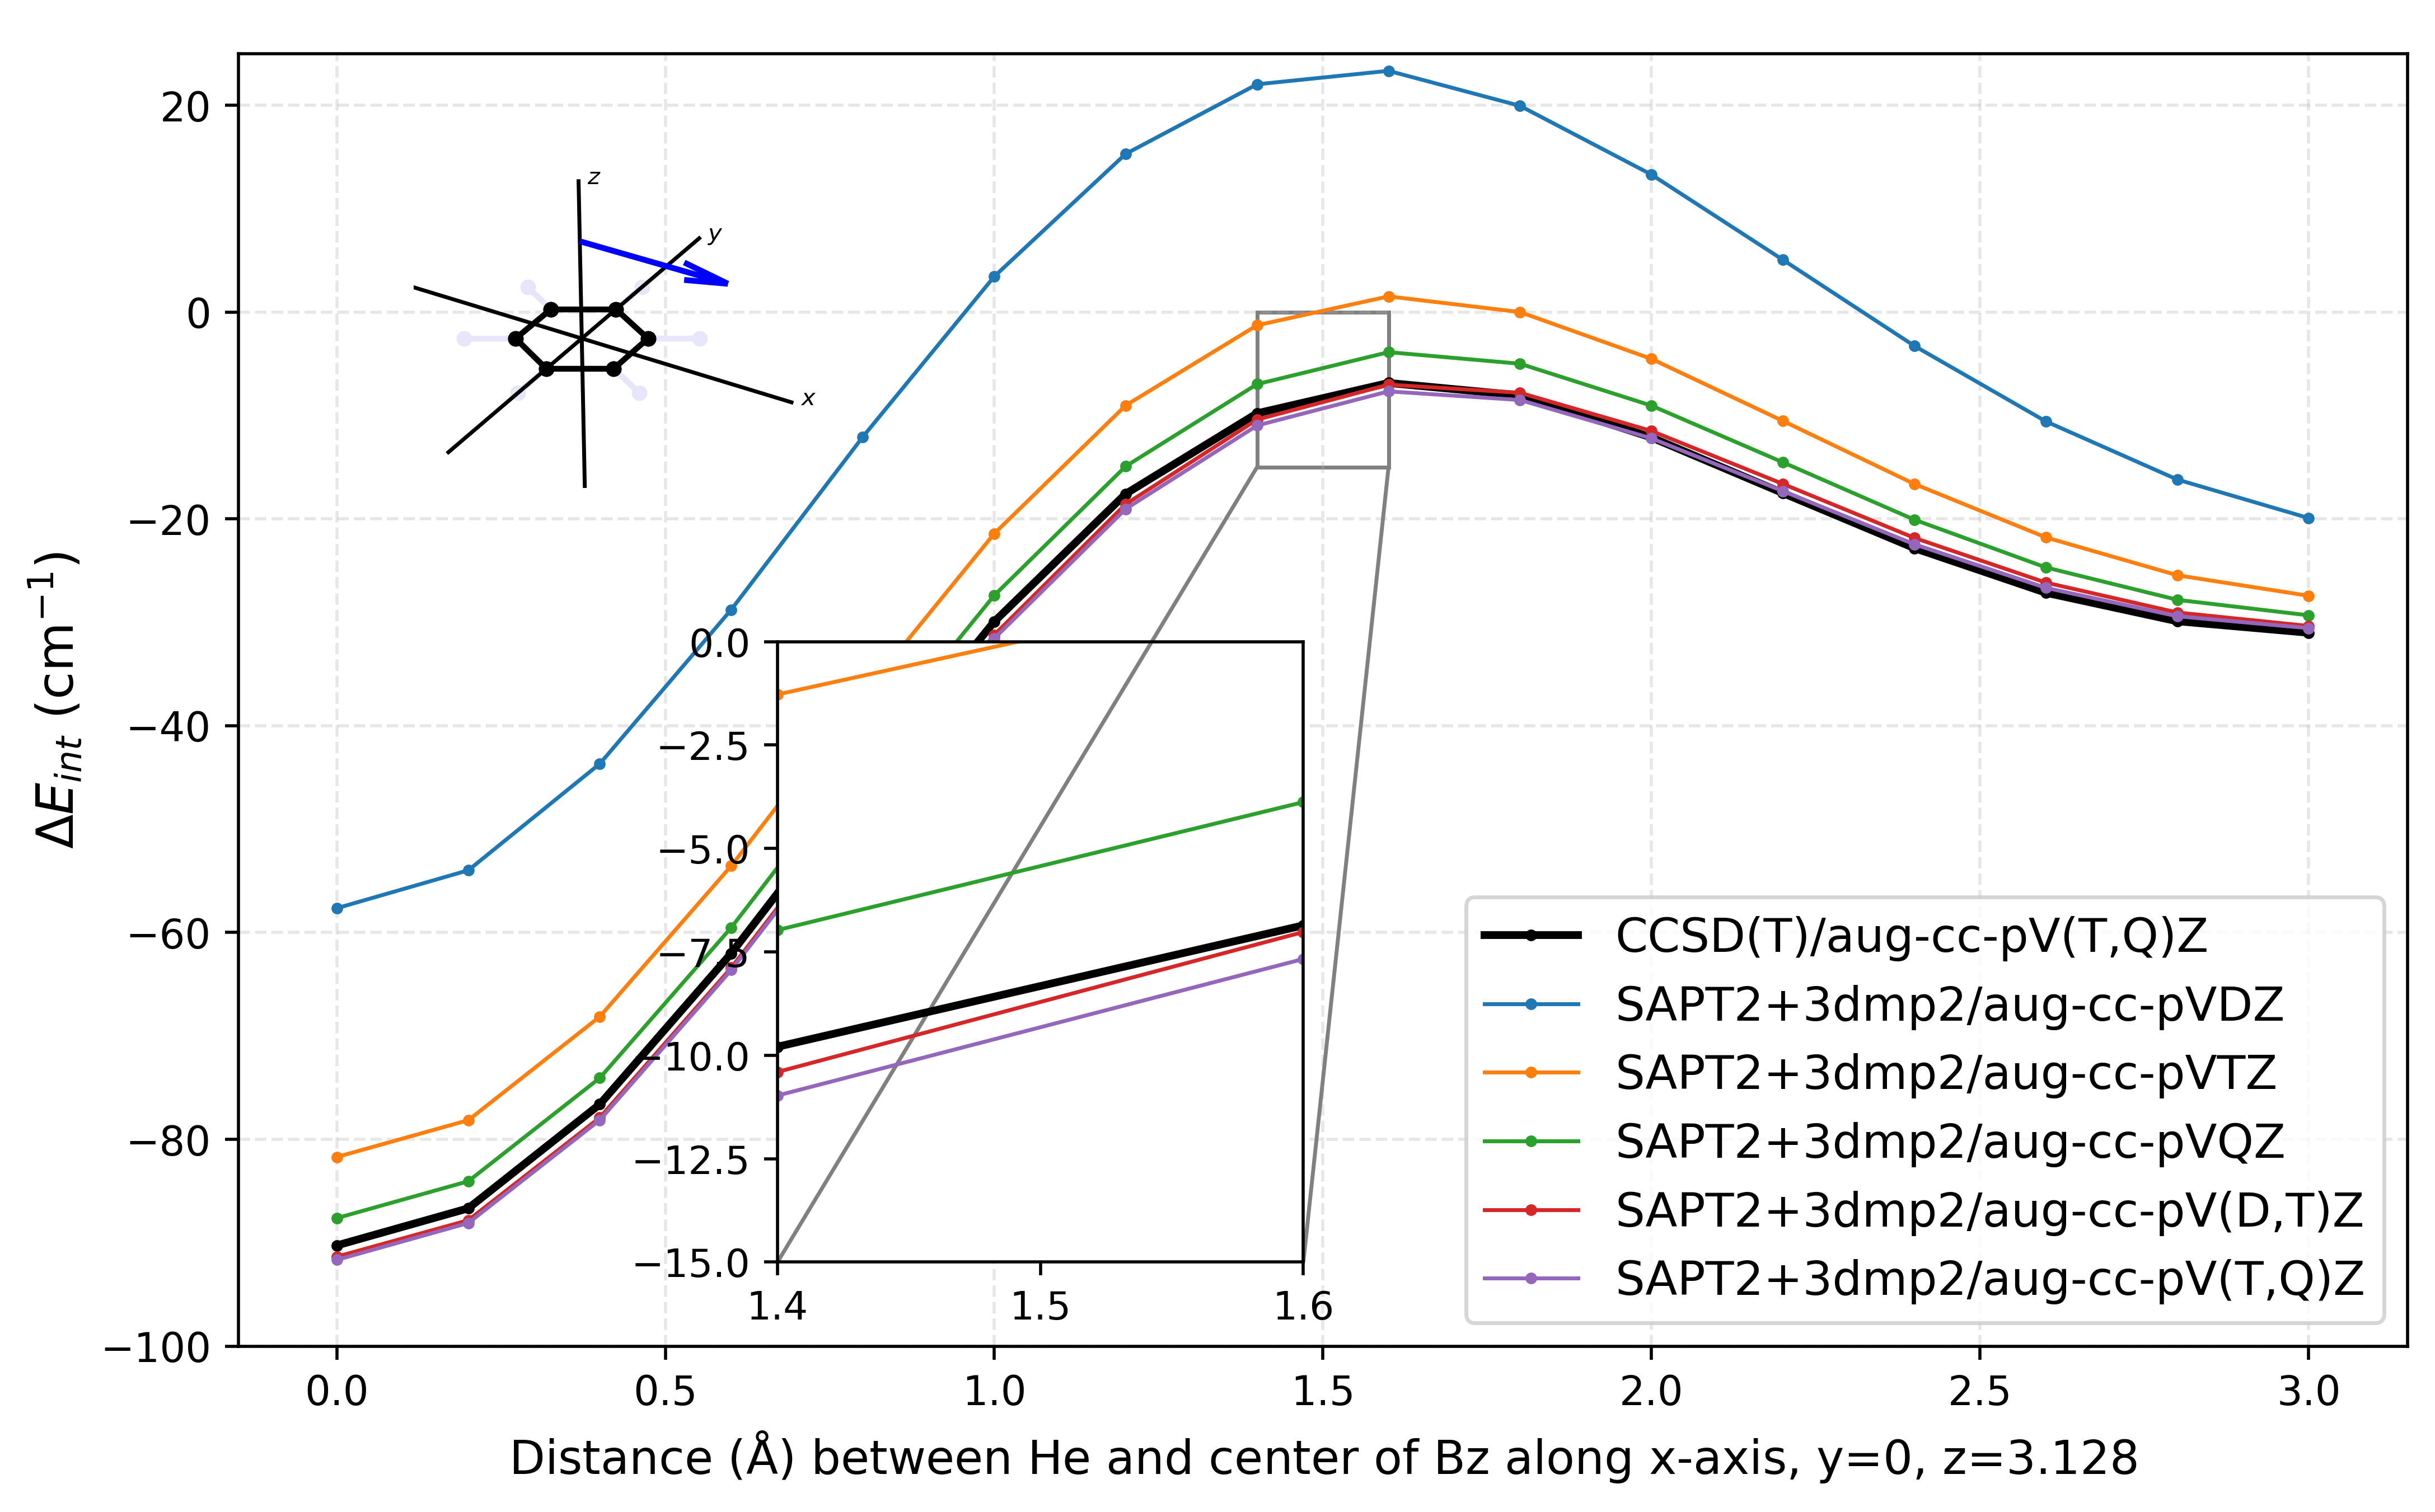

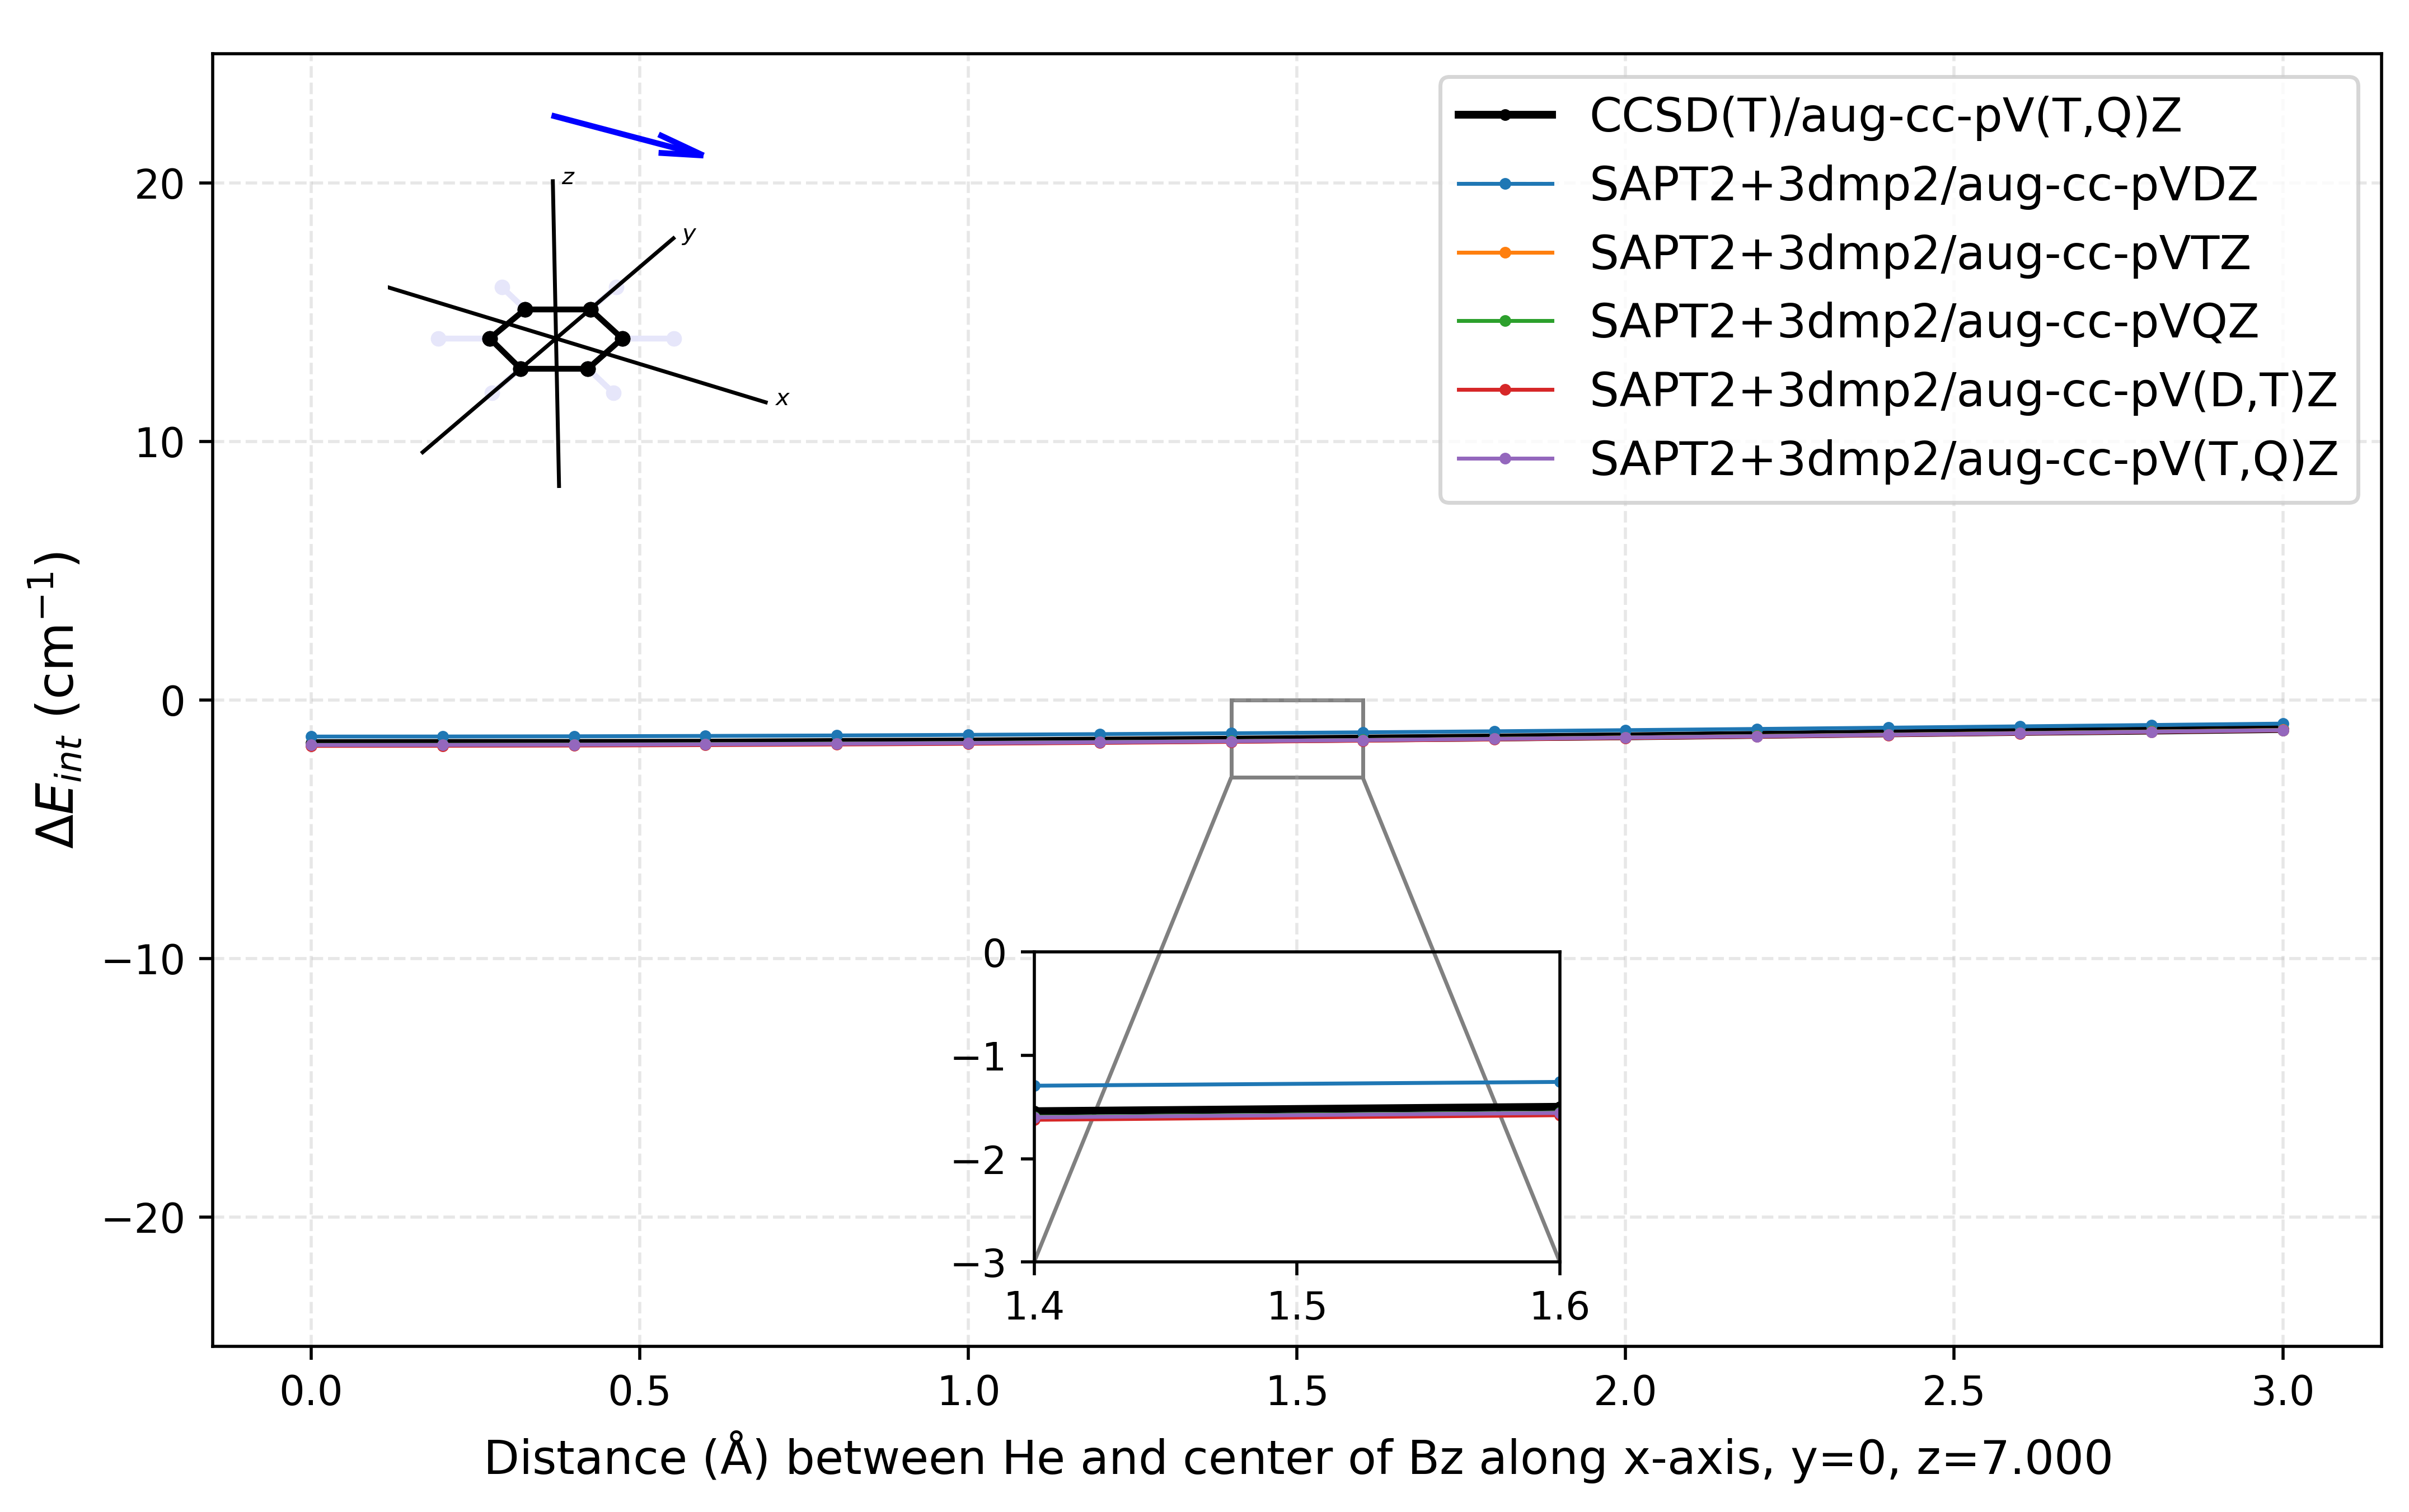

In [9]:
z_slices = [
    {"interval": 1, "ylim": (-50, 500), "ylim_zoomed": (350, 400)},
    {"interval": 12, "ylim": (-100, 25), "ylim_zoomed": (-15, 0)},
    {"interval": -1, "ylim": (-25, 25), "ylim_zoomed": (-3, 0)},
]


fig_dpi = 500


for i, z_slice in enumerate(z_slices):

    method_prefix = "sapt_"

    fig, ax = plt.subplots(figsize=(10, 6), dpi=fig_dpi)

    interval = intervals[z_slice["interval"]]
    interval_pos = np.array(
        [
            [float(i[0]), float(i[1]), float(i[2])]
            for i in sorted_pos[interval[0] : interval[1]]
        ]
    )
    indices = np.where(interval_pos[:, 1] == 0.0)[0]

    x_0_0_pos = np.array([float(pos[0]) for pos in interval_pos[indices]])

    def plot_smooth_curve(x, y, num_points=300):
        spline = make_interp_spline(x, y, k=3)
        x_smooth = np.linspace(min(x), max(x), num_points)
        y_smooth = spline(x_smooth)
        return x_smooth, y_smooth

    def get_energy_interval(energy, interval):
        return np.array(energy[interval[0] : interval[1]])[indices]

    def plot_curve(x, y, label, color, line_width):
        # x, y = plot_smooth_curve(x, y)
        # ax.plot(x, y, label=label, color=color, linewidth=line_width)

        ax.plot(
            x,
            y,
            label=label,
            linewidth=line_width,
            linestyle=line_style,
            marker=marker,
            markersize=marker_size,
            color=color,
        )
        set_plot_grid(ax)

    def plot_curve_zoomed(axins, x, y, label, color, line_width):
        # x, y = plot_smooth_curve(x, y)
        # axins.plot(x, y, label=label, color=color, linewidth=line_width)

        axins.plot(
            x,
            y,
            label=label,
            linewidth=line_width,
            linestyle=line_style,
            marker=marker,
            markersize=marker_size,
            color=color,
        )

    interval_cbs_tq = get_energy_interval(cbs_tq, interval)

    interval_cc_dz = get_energy_interval(aug_cc_pVDZ, interval)
    interval_cc_tz = get_energy_interval(aug_cc_pVTZ, interval)
    interval_cc_qz = get_energy_interval(aug_cc_pVQZ, interval)
    interval_cc_dt = get_energy_interval(cbs_dt, interval)

    interval_sapt_dz = get_energy_interval(sapt_dz, interval)
    interval_sapt_tz = get_energy_interval(sapt_tz, interval)
    interval_sapt_qz = get_energy_interval(sapt_qz, interval)

    interval_sapt_dt_cbs = get_energy_interval(sapt_dt_cbs_all, interval)
    interval_sapt_tq_cbs = get_energy_interval(sapt_tq_cbs_all, interval)

    interval_pbe0 = get_energy_interval(pbe0, interval)

    ax.set_ylim(z_slice["ylim"][0], z_slice["ylim"][1])

    curves = [
        (interval_cbs_tq, "CCSD(T)/aug-cc-pV(T,Q)Z", "black", line_width * 2),
        # (interval_pbe0, "PBE0/def2-SVP", None, line_width * 0.75),
        # (interval_cc_dz, "CCSD(T)/aug-cc-pVDZ", None, line_width* 0.75),
        # (interval_cc_tz, "CCSD(T)/aug-cc-pVTZ", None, line_width * 0.75),
        # (interval_cc_qz, "CCSD(T)/aug-cc-pVQZ", None, line_width * 0.75),
        (interval_sapt_dz, "SAPT2+3dmp2/aug-cc-pVDZ", None, line_width),
        (interval_sapt_tz, "SAPT2+3dmp2/aug-cc-pVTZ", None, line_width),
        (interval_sapt_qz, "SAPT2+3dmp2/aug-cc-pVQZ", None, line_width),
        (interval_sapt_dt_cbs, "SAPT2+3dmp2/aug-cc-pV(D,T)Z", None, line_width),
        (interval_sapt_tq_cbs, "SAPT2+3dmp2/aug-cc-pV(T,Q)Z", None, line_width),
    ]

    for curve in curves:
        plot_curve(x_0_0_pos, *curve)

    # sub_axes = plt.axes([.6, .6, .25, .25])
    # sub_axes.plot(X_detail, Y_detail, c = 'k')

    ax.set_xlabel(
        r"Distance ($\mathrm{\AA}$) between He and center of Bz along x-axis, y=0,"
        + f" z={float(interval[2]):.3f}",
        fontsize=axes_label_size,
    )

    ax.set_ylabel(r"$\Delta E_{int}$ (cm$^{-1}$)", fontsize=font_size)
    # ax.set_title(
    #     r"$\Delta E_{int}$ vs X-Coord for" + f" (x,0,{float(interval[2]):.3f})",
    #     fontsize=font_size,
    # )
    ax.tick_params(axis="both", labelsize=font_size * 0.8)

    if i == 1:
        ax.legend(fontsize=legend_font_size, loc="lower right")
    else:
        ax.legend(fontsize=legend_font_size, loc="upper right")

    if i == 1:
        axins = zoomed_inset_axes(
            ax,
            zoom=4,
            loc="lower right",
            bbox_to_anchor=(0.5, 0.05),
            bbox_transform=ax.transAxes,
        )
    else:

        axins = zoomed_inset_axes(
            ax,
            zoom=4,
            loc="lower center",
            bbox_to_anchor=(0.5, 0.05),
            bbox_transform=ax.transAxes,
        )

    for curve in curves:
        plot_curve_zoomed(axins, x_0_0_pos, *curve)

    # 5. Define the zoomed-in region
    # Set the x and y limits for the inset

    axins.set_xlim(1.4, 1.6)
    axins.set_ylim(z_slice["ylim_zoomed"][0], z_slice["ylim_zoomed"][1])

    mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")

    # # Add a legend to the main plot
    # ax.legend(loc='lower left')

    quiver_args = (0, 0, interval_pos[0][-1], 7, 0, 0)
    inset_position = [0.0, 0.62, 0.4, 0.4]
    plot_inset_benzene(ax, inset_position, *quiver_args)

    plt.savefig(
        f"{method_prefix}_(x,0,{float(interval[2]):.3f}).png",
        dpi=fig_dpi,
        bbox_inches="tight",
    )

    plt.show()